In [7]:
import pandas as pd
import numpy as np
from lightfm import LightFM
from scipy import sparse
from scipy.sparse import coo_matrix

In [8]:
df = pd.read_csv('C:/Users/hp/Documents/JupyterDemo/Data Food Items/rating_final.csv', sep = ',', header = 0)
rest_name = pd.read_csv('C:/Users/hp/Documents/JupyterDemo/Data Food Items/geoplaces2.csv', sep = ',', header = 0, encoding = "ISO-8859-1")
rest_name.head()

,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,...,No_Alcohol_Served,none,informal,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none
1,132825,22.147392,-100.983092,0101000020957F00001AD016568C4858C1243261274BA5...,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,open,none
2,135106,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rincón de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,?,...,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none
3,132667,23.752697,-99.163359,0101000020957F00005D67BCDDED8157C1222A2DC8D84D...,little pizza Emilio Portes Gil,calle emilio portes gil,victoria,tamaulipas,?,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,t,closed,none
4,132613,23.752903,-99.165076,0101000020957F00008EBA2D06DC8157C194E03B7B504E...,carnitas_mata,lic. Emilio portes gil,victoria,Tamaulipas,Mexico,?,...,No_Alcohol_Served,permitted,informal,completely,medium,?,familiar,t,closed,none


In [35]:
np.arange(1,rest_name.shape[0])

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129])

In [9]:
rest_name = rest_name.loc[:,["placeID", "name"]]
rest_name['rest_col'] = pd.DataFrame(np.arange(1,rest_name.shape[0]))
rest_name.head()

,placeID,name,rest_col
0,134999,Kiku Cuernavaca,1.0
1,132825,puesto de tacos,2.0
2,135106,El Rincón de San Francisco,3.0
3,132667,little pizza Emilio Portes Gil,4.0
4,132613,carnitas_mata,5.0


In [10]:
users = pd.read_csv('C:/Users/hp/Documents/JupyterDemo/Data Food Items/userprofile.csv', sep = ',', header = 0)
users = users.loc[:,['userID']]
users.head()

,userID
0,U1001
1,U1002
2,U1003
3,U1004
4,U1005


In [6]:
n_users = users.shape[0]
n_items = rest_name.shape[0]

In [39]:
rest_name.shape

(130, 3)

In [40]:
df['user_row'] = pd.to_numeric(df.userID.str.replace('[^0-9]',""), errors = 'coerce') - 1000
df.dtypes

userID            object
placeID            int64
rating             int64
food_rating        int64
service_rating     int64
user_row           int64
dtype: object

In [41]:
n_users

138

In [42]:
df = pd.merge(df, rest_name, on='placeID', how='inner')

In [43]:
df.head()

,userID,placeID,rating,food_rating,service_rating,user_row,name,rest_col
0,U1077,135085,2,2,2,77,Tortas Locas Hipocampo,122.0
1,U1108,135085,1,2,1,108,Tortas Locas Hipocampo,122.0
2,U1081,135085,1,2,1,81,Tortas Locas Hipocampo,122.0
3,U1056,135085,2,2,2,56,Tortas Locas Hipocampo,122.0
4,U1134,135085,2,1,2,134,Tortas Locas Hipocampo,122.0


In [44]:
df.shape

(1161, 8)

In [45]:
df['final_rating'] = np.mean(df.loc[:,["rating","food_rating","service_rating"]], axis = 1)
df.head()

,userID,placeID,rating,food_rating,service_rating,user_row,name,rest_col,final_rating
0,U1077,135085,2,2,2,77,Tortas Locas Hipocampo,122.0,2.000000
1,U1108,135085,1,2,1,108,Tortas Locas Hipocampo,122.0,1.333333
2,U1081,135085,1,2,1,81,Tortas Locas Hipocampo,122.0,1.333333
3,U1056,135085,2,2,2,56,Tortas Locas Hipocampo,122.0,2.000000
4,U1134,135085,2,1,2,134,Tortas Locas Hipocampo,122.0,1.666667


In [46]:
df1 = df.loc[:,["user_row","rest_col","rating"]]

In [47]:
df1 = df1.dropna(axis = 0)
df1[pd.isnull(df1).any(axis=1)]
df1['rest_col'] = df1['rest_col'].astype(int)

In [49]:
df1.head()

,user_row,rest_col,rating
0,77,122,2
1,108,122,1
2,81,122,1
3,56,122,2
4,134,122,2


In [50]:
df1.user_row.min()

1

In [52]:
df2 = df1

In [54]:
df2.head()

,user_row,rest_col,rating
0,77,122,2
1,108,122,1
2,81,122,1
3,56,122,2
4,134,122,2


In [55]:
"""from scipy.sparse import coo_matrix
import os.path
def no_file():
    print 'Dataset not found, please download the file from:'
    print 'http://mtg.upf.edu/static/datasets/last.fm/lastfm-dataset-360K.tar.gz (1.6GB)'
    print 'then place it in recommender_system_py/data/ and change the file_path'
    print 'variable on the fetch_lastfm function'
def fetch_lastfm(min_plays=200):
    file_path = 'data/100k_lines_lastfm.tsv'
    if not os.path.exists(file_path):
        return no_file()
    
    # Data to create our coo_matrix
    data, row, col = [], [], []
    # Artists by id, and users
    artists, users = {}, {}
    # Read the file and fill variables with data to
    # create the matrix and have the artists by id
    with open(file_path) as data_file:
        for n, line in enumerate(data_file):
            # If you use the original data from lastfm (14 million lines)
            # if n == SOMEINT: break
            # Readable data (for humans)
            readable_data = line.split('\t')
            user =           readable_data[0]
            artist_id =      readable_data[1]
            artist_name =    readable_data[2]
            plays =     int(readable_data[3])
            if user not in users:
                users[user] = len(users)
            if artist_id not in artists:
                artists[artist_id] = {
                        'name' : artist_name,
                        'id' : len(artists)
                        }
            # Data for the coo_matrix if the artist was played > 200 times
            if plays > min_plays:
                data.append(plays)
                row.append(users[user])
                col.append(artists[artist_id]['id'])
    # Our matrix: ((plays, (user, artist)))
    coo = coo_matrix((data,(row,col)))
    # We return the matrix, the artist dictionary and the amount of users
    dictionary = {
        'matrix' : coo,
        'artists' : artists,
        'users' : len(users)
    }
    return dictionary"""

"from scipy.sparse import coo_matrix\nimport os.path\ndef no_file():\n    print 'Dataset not found, please download the file from:'\n    print 'http://mtg.upf.edu/static/datasets/last.fm/lastfm-dataset-360K.tar.gz (1.6GB)'\n    print 'then place it in recommender_system_py/data/ and change the file_path'\n    print 'variable on the fetch_lastfm function'\ndef fetch_lastfm(min_plays=200):\n    file_path = 'data/100k_lines_lastfm.tsv'\n    if not os.path.exists(file_path):\n        return no_file()\n    \n    # Data to create our coo_matrix\n    data, row, col = [], [], []\n    # Artists by id, and users\n    artists, users = {}, {}\n    # Read the file and fill variables with data to\n    # create the matrix and have the artists by id\n    with open(file_path) as data_file:\n        for n, line in enumerate(data_file):\n            # If you use the original data from lastfm (14 million lines)\n            # if n == SOMEINT: break\n            # Readable data (for humans)\n            re

In [56]:
def sparse_df_to_array(df):
    num_rows = df.shape[0]   

    data = []
    row = []
    col = []

    for i, col_name in enumerate(df.columns):
        if isinstance(df[col_name], pd.SparseSeries):
            column_index = df[col_name].sp_index
            if isinstance(column_index, BlockIndex):
                column_index = column_index.to_int_index()

            ix = column_index.indices
            data.append(df[col_name].sp_values)
            row.append(ix)
            col.append(len(df[col_name].sp_values) * [i])
        else:
            data.append(df[col_name].values)
            row.append(np.array(range(0, num_rows)))
            col.append(np.array(num_rows * [i]))

    data_f = np.concatenate(data)
    row_f = np.concatenate(row)
    col_f = np.concatenate(col)

    arr = coo_matrix((data_f, (row_f, col_f)), df.shape, dtype=np.float64)
    coo_mat = arr.tocsr()
    return coo_mat

coo_mat = sparse_df_to_array(df1)
coo_mat

<1157x3 sparse matrix of type '<class 'numpy.float64'>'
	with 3471 stored elements in Compressed Sparse Row format>

In [57]:
#print(coo_mat)

In [58]:
"""model = LightFM(loss='warp')
model.fit(data['train'], epochs=30, num_threads=2)

from lightfm.evaluation import precision_at_k
# Evaluate the trained model
print("Train precision: %.2f" % precision_at_k(model, data['train'], k=5).mean())
print("Test precision: %.2f" % precision_at_k(model, data['test'], k=5).mean())

def sample_recommendation(model, data, user_ids):
    
    # no. of movies and users in training data
    n_users, n_items = data['train'].shape
    
    # generate recommendation for each user we input
    for user_id in user_ids:
        # movies they already like into compressed sparse row format
        known_positives = data['item_labels'][data['train'].tocsr()[user_id].indices]
        
        # predict movies ratings for all movies
        scores = model.predict(user_id, np.arange(n_items))
        # sorting the result in descending order
        top_items = data['item_labels'][np.argsort(-scores)]
        
        print("User %s" % user_id)
        print("     Known positives:")
        
        for x in known_positives[:3]:
            print("        %s" % x)

        print("     Recommended:")
        
        for x in top_items[:3]:
            print("        %s" % x)
        
sample_recommendation(model, data, [3, 25, 450])

"""

'model = LightFM(loss=\'warp\')\nmodel.fit(data[\'train\'], epochs=30, num_threads=2)\n\nfrom lightfm.evaluation import precision_at_k\n# Evaluate the trained model\nprint("Train precision: %.2f" % precision_at_k(model, data[\'train\'], k=5).mean())\nprint("Test precision: %.2f" % precision_at_k(model, data[\'test\'], k=5).mean())\n\ndef sample_recommendation(model, data, user_ids):\n    \n    # no. of movies and users in training data\n    n_users, n_items = data[\'train\'].shape\n    \n    # generate recommendation for each user we input\n    for user_id in user_ids:\n        # movies they already like into compressed sparse row format\n        known_positives = data[\'item_labels\'][data[\'train\'].tocsr()[user_id].indices]\n        \n        # predict movies ratings for all movies\n        scores = model.predict(user_id, np.arange(n_items))\n        # sorting the result in descending order\n        top_items = data[\'item_labels\'][np.argsort(-scores)]\n        \n        print("Use

In [59]:
coo_mat

<1157x3 sparse matrix of type '<class 'numpy.float64'>'
	with 3471 stored elements in Compressed Sparse Row format>

In [60]:
"""from sklearn import model_selection
train_data, test_data = model_selection.train_test_split(df, test_size = 0.25)

# Creating User-Item Matrices, one for Training and other for testing

# intantiating training data matrix with 0 value
train_data_matrix = np.zeros((n_users, n_items))
# iterating through the train data matrix and inputting rating
for each_line in train_data.itertuples():
    train_data_matrix[each_line[1]-1, each_line[2]-1] = each_line[3]
    
# intantiating testing data matrix with 0 value
test_data_matrix = np.zeros((n_users, n_items))
# iterating through the train data matrix and inputting rating
for each_line in train_data.itertuples():
    test_data_matrix[each_line[1]-1, each_line[2]-1] = each_line[3]"""

'from sklearn import model_selection\ntrain_data, test_data = model_selection.train_test_split(df, test_size = 0.25)\n\n# Creating User-Item Matrices, one for Training and other for testing\n\n# intantiating training data matrix with 0 value\ntrain_data_matrix = np.zeros((n_users, n_items))\n# iterating through the train data matrix and inputting rating\nfor each_line in train_data.itertuples():\n    train_data_matrix[each_line[1]-1, each_line[2]-1] = each_line[3]\n    \n# intantiating testing data matrix with 0 value\ntest_data_matrix = np.zeros((n_users, n_items))\n# iterating through the train data matrix and inputting rating\nfor each_line in train_data.itertuples():\n    test_data_matrix[each_line[1]-1, each_line[2]-1] = each_line[3]'

In [61]:
rest_name.placeID.min()

132560

In [62]:
rest_name.placeID.max()

135109

In [63]:
rest_name.placeID.max()-rest_name.placeID.min()

2549

In [64]:
n_users

138

In [3]:
data = np.zeros((n_users, n_items))
# iterating through the train data matrix and inputting rating
for each_line in df1.itertuples():
    data[each_line[1]-1, each_line[2]-1] = each_line[3]

In [16]:
data.shape

(138, 130)

In [4]:
data = sparse.coo_matrix(data)

In [68]:
#create model
model = LightFM(loss='warp')
#train model
model.fit(data, epochs=30, num_threads=2)

# Print training data
#print(data)

def sample_recommendation(model, data, user_ids):

    #number of users and movies in training data
    n_users, n_items = data.shape

    #generate recommendations for each user we input
    for user_id in user_ids:

        #movies our model predicts they will like
        scores = model.predict(user_id, np.arange(n_items))
        #print(scores)

        #rank them in order of most liked to least
        top_items = rest_name.name[np.argsort(-scores)]

        print(top_items[:5])

sample_recommendation(model, data, [9,78])

116                     Restaurante Tiberius
90                           Pizzeria Julios
121                   Tortas Locas Hipocampo
13                 Restaurante Pueblo Bonito
32     La Fontana Pizza Restaurante and Cafe
Name: name, dtype: object
26           Mariscos Tia Licha
112    Restaurant Las Mananitas
100        Sanborns Casa Piedra
64                       Subway
48                         Vips
Name: name, dtype: object


In [11]:
############ Final model Traning and testing data ####################

import pandas as pd
import numpy as np
from lightfm import LightFM
from scipy import sparse
from scipy.sparse import coo_matrix
from lightfm.evaluation import precision_at_k

df = pd.read_csv('C:/Users/hp/Documents/JupyterDemo/Data Food Items/rating_final.csv', sep = ',', header = 0)
rest_name = pd.read_csv('C:/Users/hp/Documents/JupyterDemo/Data Food Items/geoplaces2.csv', sep = ',', header = 0, encoding = "ISO-8859-1")
users = pd.read_csv('C:/Users/hp/Documents/JupyterDemo/Data Food Items/userprofile.csv', sep = ',', header = 0)
rest_name = rest_name.loc[:,["placeID", "name"]]
rest_name['rest_col'] = pd.DataFrame(np.arange(1,rest_name.shape[0]))
users = users.loc[:,['userID']]
df['user_row'] = pd.to_numeric(df.userID.str.replace('[^0-9]',""), errors = 'coerce') - 1000
df['final_rating'] = np.mean(df.loc[:,["rating","food_rating","service_rating"]], axis = 1)
df = pd.merge(df, rest_name, on='placeID', how='inner')
df1 = df.loc[:,["user_row","rest_col","final_rating"]]
df1 = df1.dropna(axis = 0)
# df1[pd.isnull(df1).any(axis=1)]
df1['rest_col'] = df1['rest_col'].astype(int)

# Splitting the Data
from sklearn import model_selection
train_data, test_data = model_selection.train_test_split(df1, test_size = 0.25)

n_users = users.shape[0]
n_items = rest_name.shape[0]

# Creating User-Item Matrices, one for Training and other for testing

# intantiating training data matrix with 0 value
train_data_matrix = np.zeros((n_users, n_items))
# iterating through the train data matrix and inputting rating
for each_line in train_data.itertuples():
    train_data_matrix[each_line[1]-1, each_line[2]-1] = each_line[3]
    
# intantiating testing data matrix with 0 value
test_data_matrix = np.zeros((n_users, n_items))
# iterating through the train data matrix and inputting rating
for each_line in train_data.itertuples():
    test_data_matrix[each_line[1]-1, each_line[2]-1] = each_line[3]
    
train_data_matrix = sparse.coo_matrix(train_data_matrix)
test_data_matrix = sparse.coo_matrix(test_data_matrix)

#create model
model = LightFM(loss='warp')
#train model
model.fit(train_data_matrix, epochs=30, num_threads=2)

# Evaluate the trained model
print("Train precision: %.2f" % precision_at_k(model, train_data_matrix, k=5).mean())
print("Test precision: %.2f" % precision_at_k(model, test_data_matrix, k=5).mean())

data = np.zeros((n_users, n_items))
# iterating through the train data matrix and inputting rating
for each_line in df1.itertuples():
    data[each_line[1]-1, each_line[2]-1] = each_line[3]
    
data = sparse.coo_matrix(data)

def sample_recommendation(model, data, user_ids):
    #number of users and movies in training data
    n_users, n_items = train_data_matrix.shape

    #generate recommendations for each user we input
    for user_id in user_ids:

        #movies our model predicts they will like
        scores = model.predict(user_id, np.arange(n_items))
        #print(scores)

        #rank them in order of most liked to least
        top_items = rest_name.name[np.argsort(-scores)]

        print(top_items[:5])

sample_recommendation(model, data, [9,78])

Train precision: 0.62
Test precision: 0.62
1                           puesto de tacos
74           Restaurante Casa de las Flores
116                    Restaurante Tiberius
47     Restaurant Bar Hacienda los Martinez
59      Restaurante El Chivero S.A. de C.V.
Name: name, dtype: object
26           Mariscos Tia Licha
112    Restaurant Las Mananitas
100        Sanborns Casa Piedra
64                       Subway
114                      Mikasa
Name: name, dtype: object


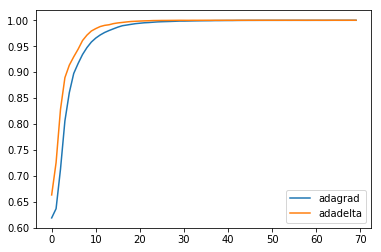

In [12]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from lightfm import LightFM
from lightfm.evaluation import auc_score


alpha = 1e-3
epochs = 70

df = pd.read_csv('C:/Users/hp/Documents/JupyterDemo/Data Food Items/rating_final.csv', sep = ',', header = 0)
rest_name = pd.read_csv('C:/Users/hp/Documents/JupyterDemo/Data Food Items/geoplaces2.csv', sep = ',', header = 0, encoding = "ISO-8859-1")
users = pd.read_csv('C:/Users/hp/Documents/JupyterDemo/Data Food Items/userprofile.csv', sep = ',', header = 0)
rest_name = rest_name.loc[:,["placeID", "name"]]
rest_name['rest_col'] = pd.DataFrame(np.arange(1,rest_name.shape[0]))
users = users.loc[:,['userID']]
df['user_row'] = pd.to_numeric(df.userID.str.replace('[^0-9]',""), errors = 'coerce') - 1000
df['final_rating'] = np.mean(df.loc[:,["rating","food_rating","service_rating"]], axis = 1)
df = pd.merge(df, rest_name, on='placeID', how='inner')
df1 = df.loc[:,["user_row","rest_col","final_rating"]]
df1 = df1.dropna(axis = 0)
# df1[pd.isnull(df1).any(axis=1)]
df1['rest_col'] = df1['rest_col'].astype(int)

# Splitting the Data
from sklearn import model_selection
train_data, test_data = model_selection.train_test_split(df1, test_size = 0.25)

n_users = users.shape[0]
n_items = rest_name.shape[0]

# Creating User-Item Matrices, one for Training and other for testing

# intantiating training data matrix with 0 value
train_data_matrix = np.zeros((n_users, n_items))
# iterating through the train data matrix and inputting rating
for each_line in train_data.itertuples():
    train_data_matrix[each_line[1]-1, each_line[2]-1] = each_line[3]
    
# intantiating testing data matrix with 0 value
test_data_matrix = np.zeros((n_users, n_items))
# iterating through the train data matrix and inputting rating
for each_line in train_data.itertuples():
    test_data_matrix[each_line[1]-1, each_line[2]-1] = each_line[3]
    
train_data_matrix = sparse.coo_matrix(train_data_matrix)
test_data_matrix = sparse.coo_matrix(test_data_matrix)

adagrad_model = LightFM(no_components=30,
                        loss='warp',
                        learning_schedule='adagrad',
                        user_alpha=alpha,
                        item_alpha=alpha)
adadelta_model = LightFM(no_components=30,
                        loss='warp',
                        learning_schedule='adadelta',
                        user_alpha=alpha,
                        item_alpha=alpha)

adagrad_auc = []

for epoch in range(epochs):
    adagrad_model.fit_partial(train_data_matrix, epochs=1)
    adagrad_auc.append(auc_score(adagrad_model, test_data_matrix).mean())
    
    
adadelta_auc = []

for epoch in range(epochs):
    adadelta_model.fit_partial(train_data_matrix, epochs=1)
    adadelta_auc.append(auc_score(adadelta_model, test_data_matrix).mean())
    
x = np.arange(len(adagrad_auc))
plt.plot(x, np.array(adagrad_auc))
plt.plot(x, np.array(adadelta_auc))
plt.legend(['adagrad', 'adadelta'], loc='lower right')
plt.show()

In [77]:
df2.shape[0]

1157

In [75]:
########################################## Adding columns to csv file #########################################################
df2.to_csv('newProcessedDf.csv')
name = int(input("What's your name? : "))
item = int(input("Item I like is : "))
rating = int(input("Enter Rating : "))
text = "%s,%s,%s,%s\n"%(df2.shape[0]+1, name, item, rating)
saveFile = open("newProcessedDf.csv", "a")
saveFile.write(text)
saveFile.close()
df1 = pd.read_csv('C:/Users/hp/Documents/JupyterDemo/newProcessedDf.csv', sep = ',', header = 0, index_col = 0)
df1.head()

,user_row,rest_col,rating
0,77,122,2
1,108,122,1
2,81,122,1
3,56,122,2
4,134,122,2


In [76]:
df.head()

,userID,placeID,rating,food_rating,service_rating,user_row,final_rating
0,U1077,135085,2,2,2,77,2.000000
1,U1077,135038,2,2,1,77,1.666667
2,U1077,132825,2,2,2,77,2.000000
3,U1077,135060,1,2,2,77,1.666667
4,U1068,135104,1,1,2,68,1.333333


In [15]:
################################ Data Firebase Work Integration###############################################################
import pandas as pd
import numpy as np
from lightfm import LightFM
from scipy import sparse
from scipy.sparse import coo_matrix
from lightfm.evaluation import precision_at_k

df = pd.read_csv('C:/Users/hp/Documents/JupyterDemo/Data Food Items/rating_final.csv', sep = ',', header = 0)
rest_name = pd.read_csv('C:/Users/hp/Documents/JupyterDemo/Data Food Items/geoplaces2.csv', sep = ',', header = 0, encoding = "ISO-8859-1")
users = pd.read_csv('C:/Users/hp/Documents/JupyterDemo/Data Food Items/userprofile.csv', sep = ',', header = 0)
rest_name = rest_name.loc[:,["placeID", "name"]]
rest_name['rest_col'] = pd.DataFrame(np.arange(1,rest_name.shape[0]))
users = users.loc[:,['userID']]
df['user_row'] = pd.to_numeric(df.userID.str.replace('[^0-9]',""), errors = 'coerce') - 1000
df['final_rating'] = np.mean(df.loc[:,["rating","food_rating","service_rating"]], axis = 1)
df = pd.merge(df, rest_name, on='placeID', how='inner')
df1 = df.loc[:,["user_row","rest_col","final_rating"]]
df1 = df1.dropna(axis = 0)
# df1[pd.isnull(df1).any(axis=1)]
df1['rest_col'] = df1['rest_col'].astype(int)

data = np.zeros((n_users, n_items))
# iterating through the train data matrix and inputting rating
for each_line in df1.itertuples():
    data[each_line[1]-1, each_line[2]-1] = each_line[3]
    
data = sparse.coo_matrix(data)

#create model
model = LightFM(no_components=30, loss='warp', learning_schedule='adagrad')
#train model
model.fit(data, epochs=30, num_threads=2)

# Print training data
#print(data)

def sample_recommendation(model, data, user_ids):

    #number of users and movies in training data
    n_users, n_items = data.shape

    #generate recommendations for each user we input
    for user_id in user_ids:

        #movies our model predicts they will like
        scores = model.predict(user_id, np.arange(n_items))
        #print(scores)

        #rank them in order of most liked to least
        top_items = rest_name.name[np.argsort(-scores)]

        #print(top_items[:5])
        
        return str(top_items[1:2])

sample_recommendation(model, data, [10])

'83    tortas hawai\nName: name, dtype: object'

In [16]:
recommendation = {}
for i in np.arange(1, users.shape[0]):
    recommendation[i] = sample_recommendation(model, data, np.linspace(i,1))

In [17]:
recommendation

{1: '45    el pueblito\nName: name, dtype: object',
 2: '1    puesto de tacos\nName: name, dtype: object',
 3: '119    Cafeteria y Restaurant El Pacifico\nName: name, dtype: object',
 4: '52    Restaurante Guerra\nName: name, dtype: object',
 5: '92    Cafe Chaires\nName: name, dtype: object',
 6: '119    Cafeteria y Restaurant El Pacifico\nName: name, dtype: object',
 7: '23    KFC\nName: name, dtype: object',
 8: '1    puesto de tacos\nName: name, dtype: object',
 9: '116    Restaurante Tiberius\nName: name, dtype: object',
 10: '83    tortas hawai\nName: name, dtype: object',
 11: '48    Vips\nName: name, dtype: object',
 12: '121    Tortas Locas Hipocampo\nName: name, dtype: object',
 13: '33    Restaurante la Estrella de Dima\nName: name, dtype: object',
 14: '125    Chaires\nName: name, dtype: object',
 15: '113    Restaurante El Cielo Potosino\nName: name, dtype: object',
 16: '48    Vips\nName: name, dtype: object',
 17: '113    Restaurante El Cielo Potosino\nName: name, dtype:

In [21]:
from firebase import firebase
import requests
firebase = firebase.FirebaseApplication("https://fir-trial-4c092.firebaseio.com")
rec = []

for i in np.arange(1, users.shape[0]):
    rec.append(str(sample_recommendation(model, data, np.linspace(i,1))))
    
for i in np.arange(1, users.shape[0]):
    firebase.put('/users2', str(i), rec[i])

# print(result3)

KeyboardInterrupt: 